In [1]:
import sys, os
import numpy as np

#The line below is necesary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set_theme()


#add ../src to system path
parent_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(parent_path,'src'))

#import DMD from ../src
from dmd import DMD
from utils import VideoIO

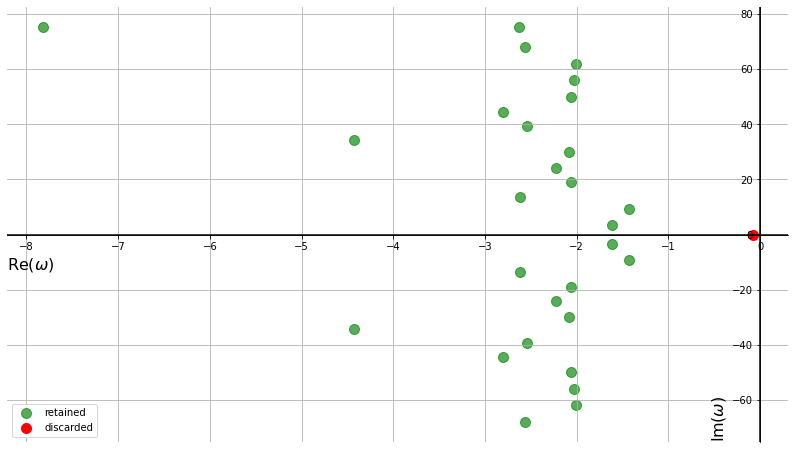

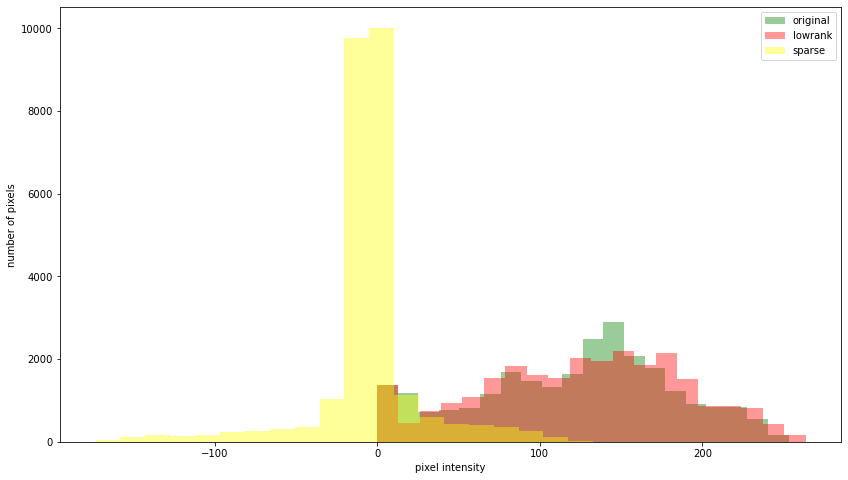

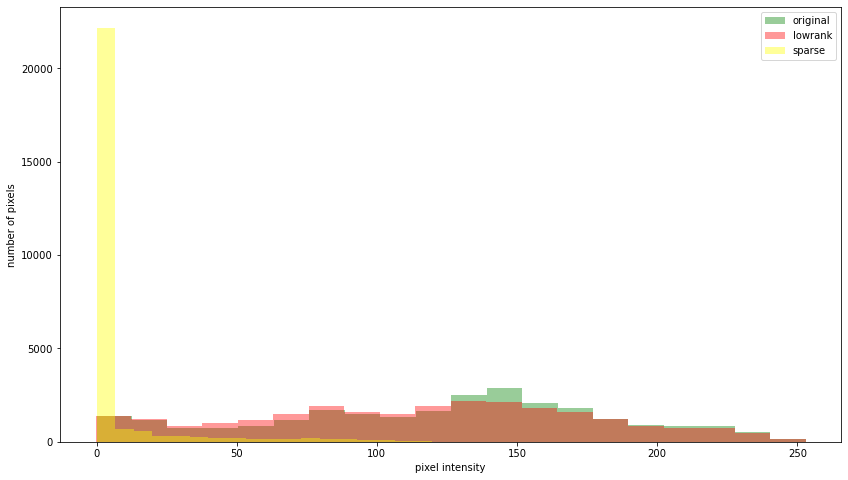

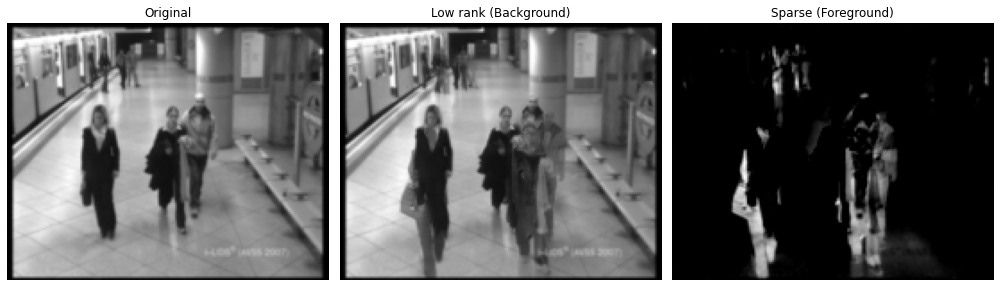

In [86]:
# video file path
videofile = 'a.mp4'
videofile_path = os.path.join(parent_path, 'data', videofile)

# variables
start_frame = 990
num_frames = 30
rank = num_frames-1
threshold = 0.1
img_idx = 10

# solve 
vid = VideoIO(videofile_path)
x = vid.stack_frames(start_frame, num_frames)
algo = DMD()
algo.solve(x, 1/(vid.fps-1), rank=rank)

# evolve
mask = algo.create_mask(threshold = threshold)
x_approx_lowrank = algo.evolve(mask = mask)
x_approx = algo.evolve(mask = None)

discarded = algo.omegas[mask]
not_discarded = algo.omegas[~mask]

#plot eigenvalues
fig_eigen, ax_eigen = plt.subplots()
fig_eigen.set_size_inches(14, 8, forward=True)
ax_eigen.grid(True)
ax_eigen.scatter(np.real(not_discarded), np.imag(not_discarded), c = 'green', s = 100, alpha = 0.65, label='retained')
ax_eigen.scatter(np.real(discarded), np.imag(discarded), c='red', s = 100, label = 'discarded')
ax_eigen.spines['left'].set_position('zero')
ax_eigen.spines['right'].set_color('none')
ax_eigen.spines['bottom'].set_position('zero')
ax_eigen.spines['top'].set_color('none')

ax_eigen.legend()
ax_eigen.set_xlabel(r'Re($\omega$)',fontsize=16, loc ='left')
ax_eigen.set_ylabel(r'Im($\omega$)', fontsize=16, loc='bottom')

plt.axvline(x = 0, color ="black", linestyle ="-")
plt.axhline(y = 0, color ="black", linestyle ="-")
fig_eigen.savefig(videofile + '_' + str(start_frame) + '_' + str(num_frames) + '_' + str(rank) + '_' + str(threshold) + '_' + str(img_idx) + '_' + 'eigen.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()


# LowRank and Sparse reconstruction
img = algo.snapshots[:, img_idx]
img_lowrank = np.real(x_approx_lowrank[:, img_idx])
img_sparse = img - img_lowrank

# histogram before
fig_hist, ax_hist = plt.subplots()
fig_hist.set_size_inches(14, 8, forward=True)
N1, bins1, patches1 = ax_hist.hist(img, bins=20, alpha=0.4, facecolor='green', label='original')
N2, bins2, patches2 = ax_hist.hist(img_lowrank, bins=20, alpha=0.4, facecolor='red', label='lowrank')
N3, bins3, patches3 = ax_hist.hist(img_sparse, bins=20, alpha=0.4, facecolor='yellow', label = 'sparse')
ax_hist.set_xlabel('pixel intensity')
ax_hist.set_ylabel('number of pixels')
ax_hist.legend()
fig_hist.savefig(videofile + '_' + str(start_frame) + '_' + str(num_frames) + '_' + str(rank) + '_' + str(threshold) + '_' + str(img_idx) + '_' + 'hist_before.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

# taking care of negative residuals 
img_sparse_copy = np.copy(img_sparse)
img_sparse_copy[img_sparse_copy > 0] = 0
img_sparse = img_sparse + np.abs(img_sparse_copy)
img_lowrank = img_lowrank + img_sparse_copy

# histogram after
fig_hist, ax_hist = plt.subplots()
fig_hist.set_size_inches(14, 8, forward=True)
N1, bins1, patches1 = ax_hist.hist(img, bins=20, alpha=0.4, facecolor='green', label='original')
N2, bins2, patches2 = ax_hist.hist(img_lowrank, bins=20, alpha=0.4, facecolor='red', label='lowrank')
N3, bins3, patches3 = ax_hist.hist(img_sparse, bins=20, alpha=0.4, facecolor='yellow', label = 'sparse')
ax_hist.set_xlabel('pixel intensity')
ax_hist.set_ylabel('number of pixels')
ax_hist.legend()
fig_hist.savefig(videofile + '_' + str(start_frame) + '_' + str(num_frames) + '_' + str(rank) + '_' + str(threshold) + '_' + str(img_idx) + '_' + 'hist_after.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()



#final plot
fig_final = plt.figure()  # create a figure object
fig_final.set_size_inches(14, 8, forward=True)
ax1 = fig_final.add_subplot(131)
ax2 = fig_final.add_subplot(132)
ax3 = fig_final.add_subplot(133)

ax1.imshow(img.reshape(algo.dim), cmap='gray')
ax1.set_axis_off()
ax1.set_title('Original')
ax2.imshow(np.real(img_lowrank.reshape(algo.dim)), cmap='gray')
ax2.set_axis_off()
ax2.set_title('Low rank (Background)')
ax3.imshow(img_sparse.reshape(algo.dim), cmap='gray')
ax3.set_axis_off()
ax3.set_title('Sparse (Foreground)')
fig_final.tight_layout()
fig_final.savefig(videofile + '_' + str(start_frame) + '_' + str(num_frames) + '_' + str(rank) + '_' + str(threshold) + '_' + str(img_idx) + '_' + 'final.png', dpi=fig.dpi, bbox_inches='tight')